In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib
%matplotlib inline
from shapely.geometry import Point
from shapely.geometry import Polygon
import fiona
import re

In [7]:
df = pd.read_excel('/Users/amandajames/Desktop/north_korea_missile_test_database.xlsx', na_values=['Unknown'])
points = df.apply(lambda row: Point(row['Facility Longitude'], row['Facility Latitude']), axis=1)
missiles = gpd.GeoDataFrame(df, geometry=points)
missiles.crs = {'init': 'epsg:5178'}
missiles.head()

,F1,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Success,Additional Information,Source(s),geometry
0,1,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966)
1,2,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966)
2,3,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,200 km,NaN,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966)
3,4,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi...",POINT (129.666664 40.8499966)
4,5,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,200 km,NaN,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966)


In [8]:
notnull= missiles[missiles['Facility Latitude'].notnull()]
notnull.head()

,F1,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,Facility Longitude,Landing Location,Apogee,Distance Travelled,Confirmation Status,Success,Additional Information,Source(s),geometry
0,1,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966)
1,2,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966)
2,3,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,200 km,NaN,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966)
3,4,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,NaN,NaN,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi...",POINT (129.666664 40.8499966)
4,5,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,129.666664,NaN,200 km,NaN,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966)


In [9]:
notnull['Date']=notnull['Date'].astype(str)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
notnull.dtypes

F1                                  int64
Date                               object
Date Entered/Updated       datetime64[ns]
Missile Name                       object
Missile Type                       object
Launch Agency/Authority            object
Facility Name                      object
Facility Location                  object
Other Name                         object
Facility Latitude                 float64
Facility Longitude                float64
Landing Location                   object
Apogee                             object
Distance Travelled                 object
Confirmation Status                object
Success                            object
Additional Information             object
Source(s)                          object
geometry                           object
dtype: object

In [11]:
notnull['Date'] = pd.to_datetime(notnull['Date'])
notnull['year'], notnull['month'] = notnull['Date'].dt.year, df['Date'].dt.month
notnull

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,F1,Date,Date Entered/Updated,Missile Name,Missile Type,Launch Agency/Authority,Facility Name,Facility Location,Other Name,Facility Latitude,...,Landing Location,Apogee,Distance Travelled,Confirmation Status,Success,Additional Information,Source(s),geometry,year,month
0,1,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,NaN,NaN,Confirmed,Success,The 1984 tests possibly took place over the co...,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966),1984,4
1,2,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,NaN,NaN,Confirmed,Success,NaN,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966),1984,4
2,3,1984-04-09,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,200 km,NaN,Confirmed,Success,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966),1984,4
3,4,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,NaN,NaN,Confirmed,Failure,NaN,"Joseph S. Bermudez, ""A History of Ballistic Mi...",POINT (129.666664 40.8499966),1984,9
4,5,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,200 km,NaN,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966),1984,9
5,6,1984-09-01,2016-12-23,Scud-B,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,200 km,NaN,Confirmed,Failure,NaN,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966),1984,9
6,7,1986-05-01,2016-12-23,NaN,NaN,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,NaN,NaN,Unconfirmed,NaN,This entry comes from reports of the South Kor...,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966),1986,5
7,8,1990-05-01,2016-12-23,Nodong,MRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,NaN,150 km,NaN,Unconfirmed,Failure,US intelligence observed this missile on the l...,http://www.astronautix.com/g/gitdaeryung.html;...,POINT (129.666664 40.8499966),1990,5
8,9,1990-06-01,2016-12-23,Scud-C,SRBM,NaN,Tonghae Satellite Launching Ground,"Hwadae County, North Hamgyong Province",Musudan-ri,40.849997,...,Sea of Japan or East Sea,200 km,NaN,Confirmed,Success,This was the first known test of the Scud-C by...,http://www.nti.org/media/pdfs/north_korea_miss...,POINT (129.666664 40.8499966),1990,6
9,10,1991-07-01,2016-12-23,Scud-C,SRBM,NaN,Chihari Missile Base,"Chiha-ri , Kangwon Province, (North Korea)",Chiha-ri Taepodong Base,38.623330,...,Sea of Japan or East Sea,NaN,NaN,Confirmed,Success,Bermudez places this test as being launched fr...,http://www.astronautix.com/k/koreanorth.html; ...,POINT (126.6847 38.62333),1991,7


In [12]:
notnull.groupby('year')['Distance Travelled'].value_counts()

year  Distance Travelled
1993  500 km                1
1998  1,380 km              1
2014  500 km                6
      200 km                4
      650 km                2
2015  490 km                2
2016  1000 km               4
      500 km                2
      30 km                 1
      400 km                1
      800 km                1
2017  1000 km               4
      500 km                2
      0 km                  1
      400 km                1
      60 km                 1
      787 km                1
      933 km                1
Name: Distance Travelled, dtype: int64

In [13]:
notnull.groupby('year')['Apogee'].value_counts()

year  Apogee   
1984  200 km       3
1990  150 km       1
      200 km       1
1992  0 km         1
1993  200 km       3
      150 km       1
2006  150 km       6
      40 km        1
2009  150 km       2
2012  581 km       1
2014  150 km       5
      100 km       2
      120 km       2
      80 km        1
2015  134 km       2
2016  10 km        1
      1400 km      1
      17 km        1
      502 km       1
2017  260 km       4
      0 km         2
      120 km       1
      189 km       1
      2111.5 km    1
      2802 km      1
      550 km       1
      560 km       1
      71 km        1
Name: Apogee, dtype: int64

In [14]:
notnull['Apogee']=notnull['Apogee'].str.replace(' km','').astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
notnull.columns

Index(['F1', 'Date', 'Date Entered/Updated', 'Missile Name', 'Missile Type',
       'Launch Agency/Authority', 'Facility Name', 'Facility Location',
       'Other Name', 'Facility Latitude', 'Facility Longitude',
       'Landing Location', 'Apogee', 'Distance Travelled',
       'Confirmation Status', 'Success', 'Additional Information', 'Source(s)',
       'geometry', 'year', 'month'],
      dtype='object')

In [17]:
apogee = notnull[['year', 'Apogee']]

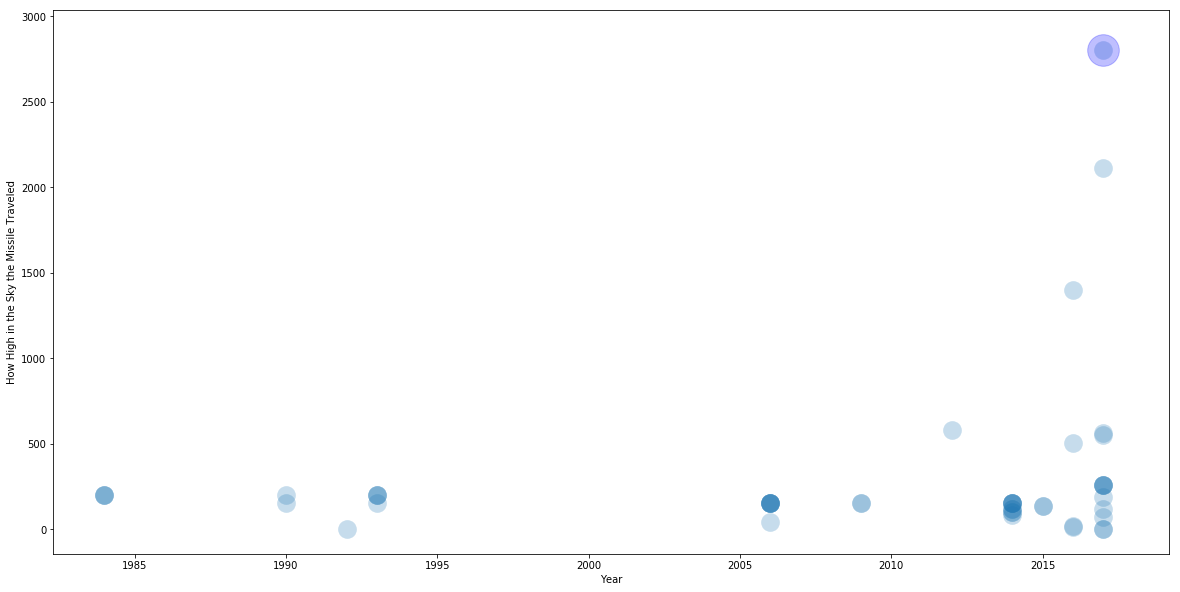

In [18]:
# sizes = df.apply(lambda row: row['Apogee'] / 100, axis=1)
ax= apogee.plot(kind='scatter', 
            x='year', 
            y='Apogee', 
            alpha=0.25,
            figsize=(20,10),
            s=350,
            linewidth=0
            )

apogee[apogee.Apogee == 2802.0].plot(kind= 'scatter', x='year', y='Apogee', s=1000, c='blue', alpha= 0.25, ax=ax)


ax.set_xlabel("Year")
ax.set_ylabel("How High in the Sky the Missile Traveled")

In [50]:
notnull['Distance Travelled']=notnull['Distance Travelled'].str.replace(',','')
# .astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
notnull['Distance Travelled']=notnull['Distance Travelled'].str.replace(' km','')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [52]:
notnull['Distance Travelled']=notnull['Distance Travelled'].astype(float)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
notnull.groupby('year')['Distance Travelled'].value_counts()
#add facility location 
#plot on map

year  Distance Travelled
1993  500.0                 1
1998  1380.0                1
2014  500.0                 6
      200.0                 4
      650.0                 2
2015  490.0                 2
2016  1000.0                4
      500.0                 2
      30.0                  1
      400.0                 1
      800.0                 1
2017  1000.0                4
      500.0                 2
      0.0                   1
      60.0                  1
      400.0                 1
      787.0                 1
      933.0                 1
Name: Distance Travelled, dtype: int64

In [55]:
distance = notnull[['year', 'Distance Travelled']].dropna()
distance.head()

,year,Distance Travelled
11,1993,500.0
15,1998,1380.0
39,2014,200.0
40,2014,200.0
41,2014,200.0


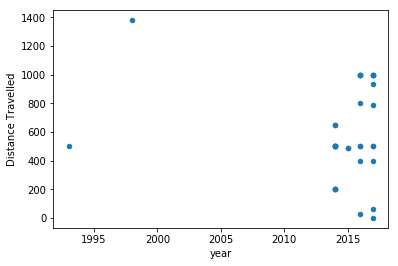

In [57]:
distance.plot(x='year', y='Distance Travelled', kind='scatter')

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


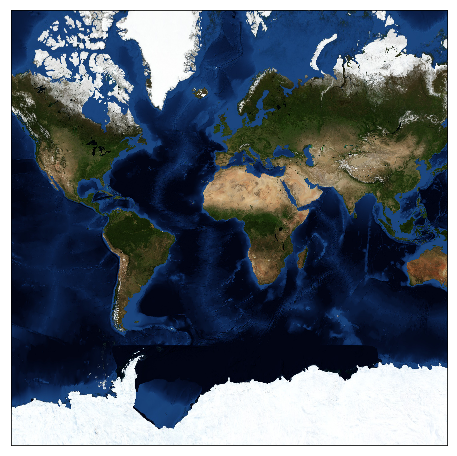

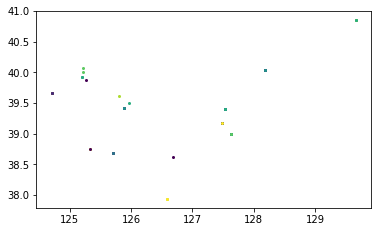

In [142]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# # Set the size of the map
plt.figure(figsize=(8,8))

# # Set the projection and the center
# # Adjusted options from above because you can't do -180 to 180 with longitude
map = Basemap(projection='merc', llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-140,urcrnrlon=140,lat_ts=20,resolution='c')

# # Blue marble
# # https://visibleearth.nasa.gov/view_cat.php?categoryID=1484
map.bluemarble()

# # Show the map
plt.show()
notnull.plot()

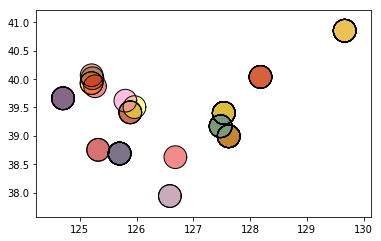

In [35]:
#set xlim and ylim for lat and long
#look at vids 
notnull.buffer(0.2).plot()


